In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data_frame = pd.read_csv('reaction_hospital.csv')

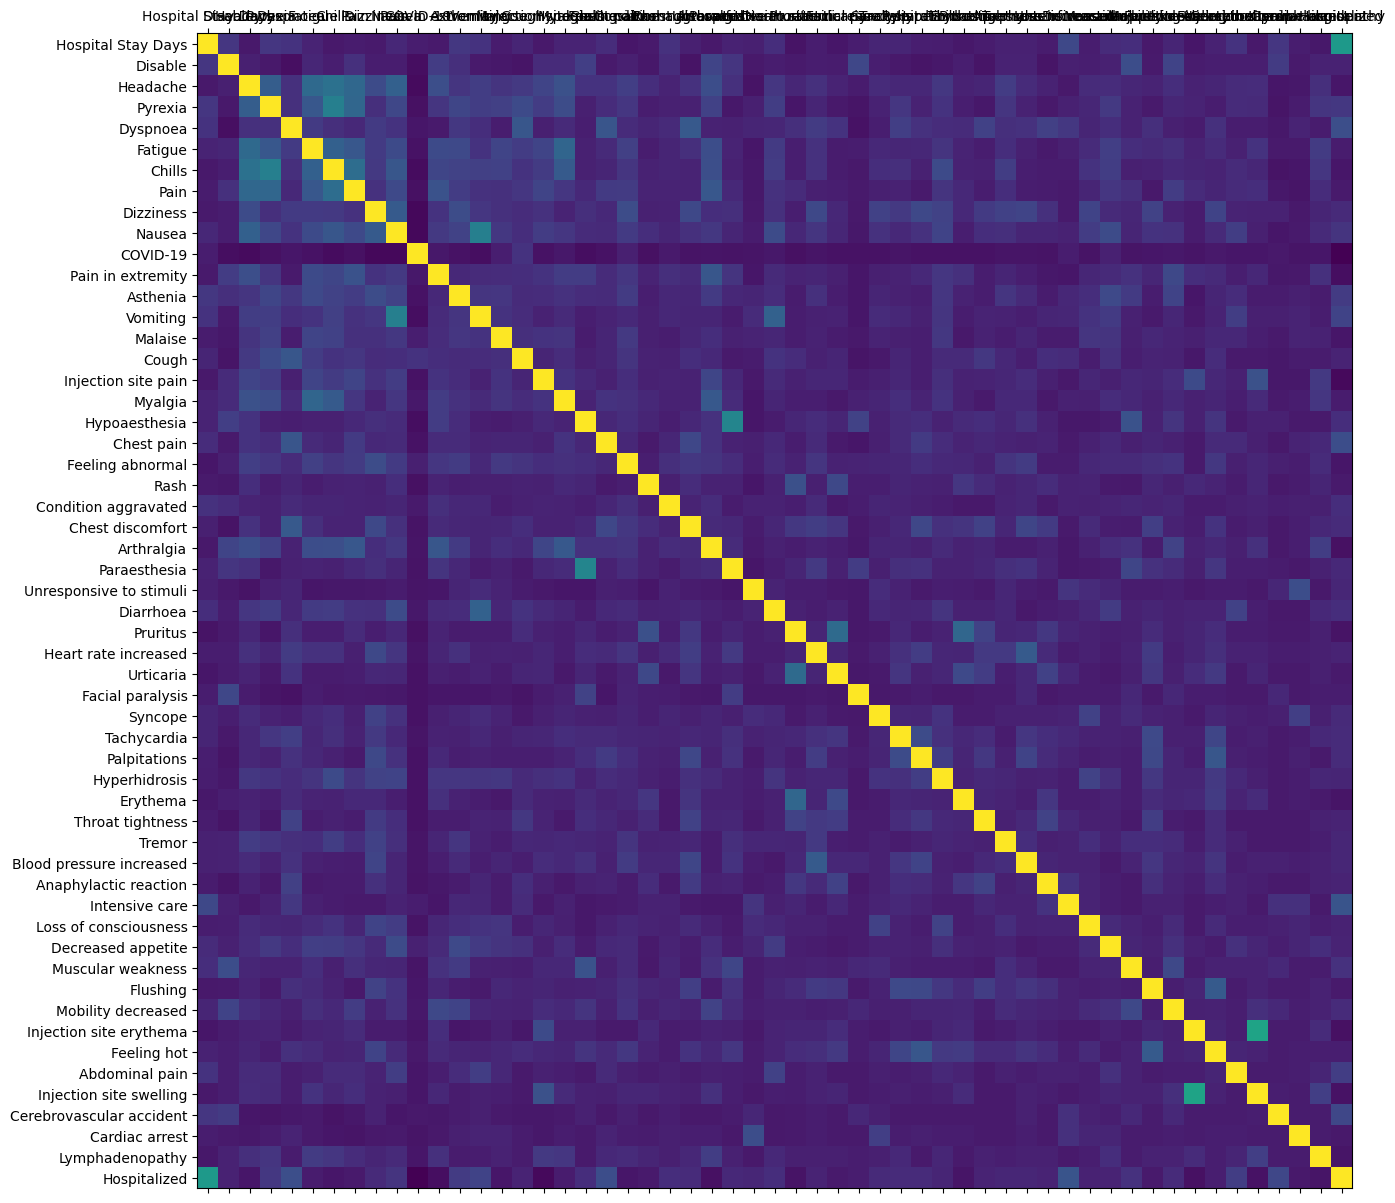

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]
114.80% in training set
28.72% in test set


In [9]:
from sklearn.model_selection import train_test_split
import random

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['Hospitalized']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values
random.shuffle(y)
print(y)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X, y)

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_accuracy_traindata = metrics.accuracy_score(y_train, rf_predict_train)

importances = rf_model.feature_importances_

y_pred = rf_model.predict(X_test)

print ("RF Training accuracy: {0:.2f}".format(rf_accuracy_traindata))
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

RF Training accuracy: 0.76
              precision    recall  f1-score   support

           1       0.58      0.80      0.68       732
           0       0.71      0.45      0.55       764

    accuracy                           0.62      1496
   macro avg       0.65      0.63      0.61      1496
weighted avg       0.65      0.62      0.61      1496

Test Accuracies
0.62
0.58
0.80
0.68
0.63
13.54
Feature importnaces:
0.12057712589443534
0.02351674450999082
0.038736969086868155
0.04079920497409352
0.028903312898671325
0.02868993556388486
0.029950090539792487
0.030796669909828153
0.03168680063543402
0.024473264521645246
0.0148726097165526
0.02458810856045629
0.023393130525445244
0.02102419495304612
0.023321998610308835
0.01694942697188281
0.018530746434963347
0.019193103103894427
0.01674408099495272
0.016331340158221866
0.021882004613083077
0.01392273989472694
0.02146984633820521
0.015391360840386201
0.01417309798354447
0.012345877823586204
0.015818239734935142
0.01451870555724791
0.009

In [11]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

lgbm = lgb.LGBMClassifier(random_state = 42)
lgbm.fit(X_train, y_train.ravel())

y_t = lgbm.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

importances = lgbm.feature_importances_

train_acc = metrics.accuracy_score(y_train, y_t)

print ("LGBM Training accuracy: {0:.2f}".format(train_acc))

# predict
y_pred = lgbm.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 3006, number of negative: 2974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 5980, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502676 -> initscore=0.010702
[LightGBM] [Info] Start training from score 0.010702
LGBM Training accuracy: 0.66
Confusion Matrix
[[495 237]
 [388 376]]
Classification Report
              precision    recall  f1-score   support

           1       0.56      0.68      0.61       732
           0       0.61      0.49      0.55       764

    accuracy                           0.58      1496
   macro avg       0.59      0.58      0.58      1496
weighted avg       0.59      0.58      0.58      1496

Test Accuracies
0.58
0.56
0.68

In [12]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
clf = svm.SVC(kernel='linear', random_state=42)

clf.fit(X_train, y_train)
svm_predict_train = clf.predict(X_train)

#get accuracy
svm_train_accuracy = metrics.accuracy_score(y_train, svm_predict_train)

#print accuracy
print ("SVM training Accuracy: {0:.2f}".format(svm_train_accuracy))

importances = clf.coef_[0]

y_pred = clf.predict(X_test)

print ("Confusion Matrix for SVM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


y_pred = np.where(y_pred > 0.5, 1, 0)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

SVM training Accuracy: 0.59
Confusion Matrix for SVM
[[569 163]
 [504 260]]
Classification Report

              precision    recall  f1-score   support

           1       0.53      0.78      0.63       732
           0       0.61      0.34      0.44       764

    accuracy                           0.55      1496
   macro avg       0.57      0.56      0.53      1496
weighted avg       0.57      0.55      0.53      1496

Test Accuracies
0.55
0.53
0.78
0.63
0.56
16.07
Feature importnaces:
-2.6337100680340342e-05
-7.41548133136316e-05
9.966632086211291e-05
-8.877605434776115e-05
-0.05593594240222499
-0.07693413851930986
-1.3659347141814493e-05
-3.2291702807718536e-05
-8.698860851641399e-06
-0.00018742853295883322
-0.22752735121656054
-0.07266282991948048
-0.07644696762163838
-0.11705066465656166
-0.11743388439779312
-0.27428877405709007
-0.07074589826928857
8.2658138709224e-06
-0.09492943972447754
-0.012966797142935915
-9.66370468760136e-05
-0.21324206052872974
-1.9775765928597977e-05
-

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
dtc_predict_train = dtc_model.predict(X_train)

#get accuracy
dtc_accuracy = metrics.accuracy_score(y_train, dtc_predict_train)

#print accuracy
print ("DT training Accuracy: {0:.2f}".format(dtc_accuracy))

importances = dtc_model.feature_importances_

y_pred = dtc_model.predict(X_test)

print ("Confusion Matrix for Decision Tree")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

DT training Accuracy: 0.76
Confusion Matrix for Decision Tree
[[594 138]
 [463 301]]
Classification Report

              precision    recall  f1-score   support

           1       0.56      0.81      0.66       732
           0       0.69      0.39      0.50       764

    accuracy                           0.60      1496
   macro avg       0.62      0.60      0.58      1496
weighted avg       0.63      0.60      0.58      1496

Test Accuracies
0.60
0.56
0.81
0.66
0.60
14.48
Feature importnaces:
0.10706866526197621
0.030065257815749365
0.049051922801330895
0.04215442845896783
0.02547626210777369
0.010913119998501912
0.03803035787464353
0.022936707721251864
0.02874727751694419
0.0328180228474711
0.00785781418708114
0.023284867475950544
0.030545319938604272
0.030086932066788707
0.033720039690021526
0.016410574943015958
0.02520704571089249
0.018009079641372997
0.00845318433333934
0.024973821047476686
0.024417069880301248
0.00954146602739598
0.017069365180250703
0.013365881023114487
0.01

In [14]:
from xgboost import XGBClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predict_train = xgb_model.predict(X_train)
xgb_accuracy = metrics.accuracy_score(y_train, xgb_predict_train)

#print accuracy
print ("XGB training Accuracy: {0:.2f}".format(xgb_accuracy))


importances = xgb_model.feature_importances_

y_pred = xgb_model.predict(X_test)

print ("Confusion Matrix for XGBoost")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

XGB training Accuracy: 0.69
Confusion Matrix for XGBoost
[[506 226]
 [387 377]]
Classification Report

              precision    recall  f1-score   support

           1       0.57      0.69      0.62       732
           0       0.63      0.49      0.55       764

    accuracy                           0.59      1496
   macro avg       0.60      0.59      0.59      1496
weighted avg       0.60      0.59      0.59      1496

Test Accuracies
0.59
0.57
0.69
0.62
0.59
14.77
Feature importnaces:
0.012161992
0.012758041
0.013950562
0.013907412
0.01325589
0.018057821
0.014481474
0.016512094
0.014027194
0.013471732
0.021993449
0.020516539
0.017679008
0.016152082
0.019195102
0.05430544
0.017333303
0.01454222
0.016761087
0.015638066
0.018214036
0.030281514
0.017846044
0.024281505
0.021331277
0.014337597
0.018428953
0.018847624
0.01828139
0.02797866
0.011379584
0.027183998
0.014280822
0.013669161
0.01284319
0.024470666
0.007661428
0.010824786
0.0113887945
0.0336297
0.013326224
0.017992143
0.048

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                      subsample=1,max_features='sqrt', random_state=42)
baseline.fit(X_train, y_train)
gbm_predict_train = baseline.predict(X_train)
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

print ("GBM training Accuracy: {0:.2f}".format(gbm_accuracy))

importances = baseline.feature_importances_

y_pred = baseline.predict(X_test)

print ("Confusion Matrix for GBM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

GBM training Accuracy: 0.62
Confusion Matrix for GBM
[[556 176]
 [454 310]]
Classification Report

              precision    recall  f1-score   support

           1       0.55      0.76      0.64       732
           0       0.64      0.41      0.50       764

    accuracy                           0.58      1496
   macro avg       0.59      0.58      0.57      1496
weighted avg       0.60      0.58      0.57      1496

Test Accuracies
0.58
0.55
0.76
0.64
0.58
15.18
Feature importnaces:
0.02714926085994545
0.004731901108910067
0.006979601109889075
0.005847707205394458
0.027559075232595293
0.03066014712685315
0.009384853807635896
0.01831144171924994
0.0070186017215200834
0.02067069135707372
0.02284350661385284
0.024903588345428516
0.016673757337013418
0.020459684045794464
0.01080138823354452
0.07993705488221714
0.013899904057582265
0.008183494246832401
0.02702730552929342
0.009763308078589184
0.005256696864679526
0.040795274672670016
0.004427214834592187
0.04317122627929483
0.01556494

In [16]:
from sklearn.metrics import roc_curve

pred_prob1 = rf_model.predict_proba(X_test)
pred_prob2 = dtc_model.predict_proba(X_test)
pred_prob3 = xgb_model.predict_proba(X_test)
pred_prob4 = baseline.predict_proba(X_test)
pred_prob5 = clf.decision_function(X_test)
pred_prob6 = lgbm.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<ipython-input-17-fa0915db247a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


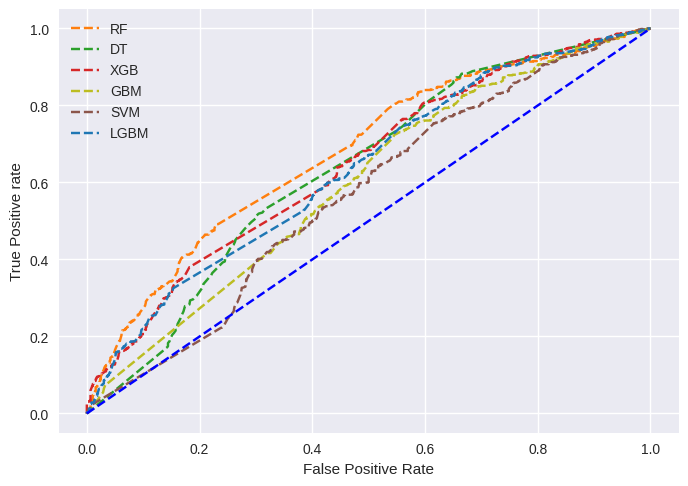

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='RF')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='DT')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='XGB')
plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();